In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [4]:
import os
import cv2
from PIL import Image
import numpy as np

In [5]:
image_directory = 'archive/train/'
SIZE = 350
dataset = [] 
label = [] 

In [6]:
parasitized_images = os.listdir(image_directory + 'aug-bad/')
for i, image_name in enumerate(parasitized_images):   
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'aug-bad/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
uninfected_images = os.listdir(image_directory + 'good/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'good/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [14]:
dataset = np.array(dataset)
label = np.array(label)

# #suffle the dataset
# from sklearn.utils import shuffle
# dataset, label = shuffle(dataset, label, random_state=0)

print(dataset.shape)
print(label.shape)

# convert 4d dataset into a 2d array
# dataset1 = dataset.reshape(dataset.shape[0], -1).T
# print(dataset1.shape)


(367500, 450)
(450,)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

INPUT_SHAPE = (SIZE, SIZE, 3)  

print(X_train.shape)
print(X_test.shape)
print(y_test)

(360, 350, 350, 3)
(90, 350, 350, 3)
[0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1]


In [43]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))  


model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [44]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

print(model.summary()) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 174, 174, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 86, 86, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 84, 84, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 42, 42, 128)     

In [45]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('screw_model_15.h5')  

Epoch 1/10
6/6 [==============================] - 164s 11s/step - loss: 0.6939 - accuracy: 0.4889 - val_loss: 0.6917 - val_accuracy: 0.5556
Epoch 2/10
6/6 [==============================] - 57s 9s/step - loss: 0.6904 - accuracy: 0.5556 - val_loss: 0.6889 - val_accuracy: 0.5556
Epoch 3/10
6/6 [==============================] - 55s 9s/step - loss: 0.6892 - accuracy: 0.5556 - val_loss: 0.6883 - val_accuracy: 0.5556
Epoch 4/10
6/6 [==============================] - 55s 9s/step - loss: 0.6888 - accuracy: 0.5556 - val_loss: 0.6879 - val_accuracy: 0.5556
Epoch 5/10
6/6 [==============================] - 55s 9s/step - loss: 0.6885 - accuracy: 0.5556 - val_loss: 0.6877 - val_accuracy: 0.5556
Epoch 6/10


KeyboardInterrupt: 

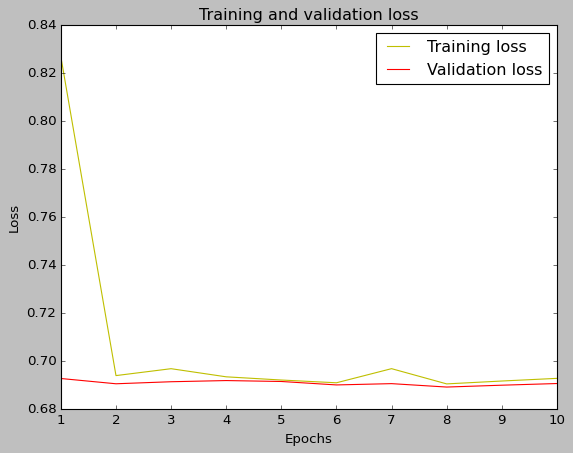

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

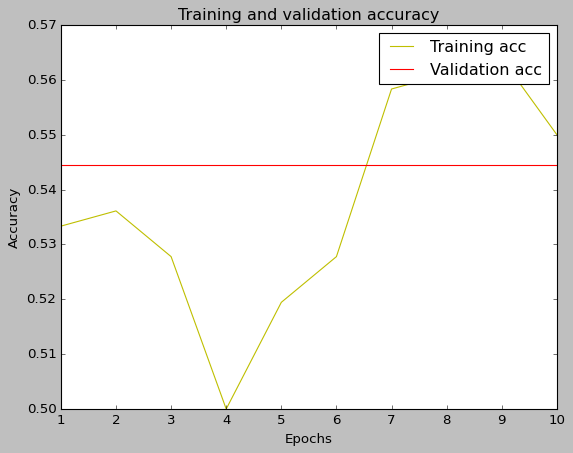

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# n=24  #Select the index of image to be loaded for testing
# img = X_test[n]
# plt.imshow(img)
# input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
# print("The prediction for this image is: ", model.predict(input_img))
# print("The actual label for this image is: ", y_test[n])

In [ ]:
# from keras.models import load_model
# # load model
# model = load_model('malaria_model.h5')

# #For 300 epochs, giving 82.5% accuracy

# _, acc = model.evaluate(X_test, y_test)
# print("Accuracy = ", (acc * 100.0), "%")

In [ ]:
# mythreshold=0.908
# from sklearn.metrics import confusion_matrix

# y_pred = (model.predict(X_test)>= mythreshold).astype(int)
# cm=confusion_matrix(y_test, y_pred)  
# print(cm)

In [ ]:
# from sklearn.metrics import roc_curve
# y_preds = model.predict(X_test).ravel()

# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.show()

In [ ]:
# import pandas as pd
# i = np.arange(len(tpr)) 
# roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
# ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
# print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

In [ ]:
# from sklearn.metrics import auc
# auc_value = auc(fpr, tpr)
# print("Area under curve, AUC = ", auc_value)

In [ ]:
# Calculate precision and recall and F1 score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities for test set
yhat = model.predict(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 0]
# predict crisp classes for test set
yhat = model.predict_classes(X_test)
# reduce to 1d array
yhat = yhat[:, 0]
# calculate precision and recall for each threshold
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)
# convert to f1 scores
f1 = f1_score(y_test, yhat)
# convert to auc
auc = auc(recall, precision)
# summarize scores
print('f1=%.3f auc=%.3f' % (f1, auc))

print("Precision: ", precision)
print("Recall: ", recall)
print("Thresholds: ", thresholds)
print("F1: ", f1)